In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

import pandas as pd

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt



pd.set_option('display.max_columns', None)

In [3]:
# Authenticate using Kaggle API token
api = KaggleApi()
api.authenticate()

# Download the dataset
api.dataset_download_files('iammattaustin/ontario-school-absenteeism-2022', path='./data', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/iammattaustin/ontario-school-absenteeism-2022


In [4]:
# Define the path to the CSV file
data_dir = "data"
csv_filename = "AllOnSchoolAbsences.csv"  # Replace with the actual file name
csv_path = os.path.join(data_dir, csv_filename)

# Load the CSV file into a pandas DataFrame
ont_abs = pd.read_csv(csv_path)

# Display the first few rows
ont_abs.head()

,School Number,Date,School Name,City,Province,School Language,Street,Postal Code,School Type,Grade Range,School Website,Board Name,Board Website,School Level,Enrolment,Board Type,Board Number,Est Absent Students,Number of Rows (Aggregated),Region,Board Language,School Special Conditions,Suite,PO Box,Country,Phone,Fax,Date Open,Email,School Special Condition Code,Building Suite,P.O. Box,Municipality,Phone Number,Fax Number,Latitude,Longitude,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Grade 3 Students Achieving the Provincial Standard in Reading,Change in Grade 3 Reading Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Writing,Change in Grade 3 Writing Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics,Change in Grade 3 Mathematics Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Reading,Change in Grade 6 Reading Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Writing,Change in Grade 6 Writing Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of School-Aged Children Who Live in Low-Income Households,"Percentage of Students Whose Parents Have No Degree, Diploma or Certificate",Extract Date,absence_percentage_staff_students
0,792217.0,2022-03-07,St. Francis Xavier Catholic Elementary School,Stoney Creek,Ontario,English,298 8 Hwy,L8G1E6,Catholic,JK-8 Incl,http://stfx.hwcdsb.ca/,Hamilton-Wentworth CDSB,http://www.hwcdsb.ca/,Elementary,425.0,Cath Dist Sch Brd (E/F),B67121,42.0,1.0,West Region,English,Not applicable,NaN,NaN,Canada,905-523-2333,905-662-3412,1969-09-01,NaN,Not applicable,NaN,NaN,Hamilton,905-523-2333,905-662-3412,43.22000,-79.7323,15,100,0,0,10,0,88%,1.0,79%,-18.0,79%,-3.0,84%,1.0,90%,-7.0,61%,11.0,NaN,NaN,NaN,NaN,NaN,NaN,10,5,4-Mar-22,0.10
1,677523.0,2022-02-24,Rockhaven School forExceptional Children Publi...,Serpent River,Ontario,English,1459 Riverview Rd,P0P1V0,Public,JK-8 Incl,http://www.adsb.on.ca/sites/schools/roc/defaul...,Algoma DSB,http://www.adsb.on.ca,Elementary,NaN,Pub Dist Sch Brd (E/F),B28010,NaN,1.0,North Region,English,Not applicable,NaN,NaN,Canada,705-844-2168,705-844-2396,1970-01-01,baillas@adsb.on.ca,Not applicable,NaN,NaN,Elliot Lake,705-844-2168,705-844-2396,46.20975,-82.5408,SP,SP,SP,SP,SP,SP,N/R,NaN,N/R,NaN,N/R,NaN,N/D,NaN,N/D,NaN,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,SP,4-Mar-22,0.11
2,464562.0,2022-02-08,Queen Mary Public School,Peterborough,Ontario,English,1445 Monaghan St,K9J5M8,Public,JK-8 Incl,http://queenmary.kprdsb.ca/,Kawartha Pine Ridge DSB,http://www.kprschools.ca,Elementary,365.0,Pub Dist Sch Brd (E/F),B66079,54.0,1.0,East Region,English,Not applicable,NaN,NaN,Canada,705-745-1353,705-745-1617,1969-09-01,QueenMaryPS@kprdsb.ca,Not applicable,NaN,NaN,Peterborough,705-745-1353,705-745-1617,44.30515,-78.3384,15,100,10,10,20,0,52%,13.0,45%,1.0,52%,8.0,71%,0.0,68%,-3.0,26%,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,30,10,4-Mar-22,0.15
3,538833.0,2022-03-11,Stornoway Crescent Public School,Thor

In [5]:
print(f"The dataframe contains {ont_abs.shape[0]} rows and {ont_abs.shape[1]} columns.")

The dataframe contains 197944 rows and 65 columns.


In [6]:
for start in range(0, ont_abs.shape[1], 20):
    end = min(start + 20, ont_abs.shape[1])
    print(f"\nColumns {start} to {end-1}:\n")
    print(ont_abs.iloc[:, start:end].info())


Columns 0 to 19:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197944 entries, 0 to 197943
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School Number                197943 non-null  float64
 1   Date                         197043 non-null  object 
 2   School Name                  197944 non-null  object 
 3   City                         197890 non-null  object 
 4   Province                     197944 non-null  object 
 5   School Language              197944 non-null  object 
 6   Street                       197894 non-null  object 
 7   Postal Code                  197885 non-null  object 
 8   School Type                  197944 non-null  object 
 9   Grade Range                  197897 non-null  object 
 10  School Website               188520 non-null  object 
 11  Board Name                   197944 non-null  object 
 12  Board Website                197896 non

In [7]:
numeric_types = ['int64', 'float64']

numeric_columns = ont_abs.select_dtypes(include=numeric_types)
non_numeric_columns = ont_abs.select_dtypes(exclude=numeric_types)

print(f"We have {numeric_columns.shape[1]} numeric columns and {non_numeric_columns.shape[1]} non-numeric columns.")

We have 16 numeric columns and 49 non-numeric columns.


In [35]:
def remove_columns_with_missing(df, missing_threshold=40):
    """
    Removes columns with more than the specified percentage of missing values.

    Parameters:
    - df: The DataFrame to process.
    - missing_threshold: The percentage threshold for filtering columns with missing data (default is 40%).

    Returns:
    - A new DataFrame with the columns having more than the missing threshold removed.
    """
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100

    # Identify columns with more than the specified percentage of missing values
    columns_with_missing = missing_percentage[missing_percentage > missing_threshold].index

    # Remove the columns with missing values
    df_filtered = df.drop(columns=columns_with_missing)

    # Display the columns that were removed
    if len(columns_with_missing) > 0:
        print(f"The following columns had more than {missing_threshold}% missing values and were removed:")
        for col in columns_with_missing:
            print(f"- {col}: Missing percentage: {missing_percentage[col]:.2f}%")
    else:
        print(f"There are no columns with more than {missing_threshold}% missing values.")
    
    return df_filtered

# Usage example
ont_abs_filtered_missing = remove_columns_with_missing(ont_abs, missing_threshold=40)


The following columns had more than 40% missing values and were removed:
- Suite: Missing percentage: 99.22%
- PO Box: Missing percentage: 97.31%
- Building Suite: Missing percentage: 99.57%
- P.O. Box: Missing percentage: 97.36%
- Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics: Missing percentage: 85.07%
- Change in Grade 9 Academic Mathematics Achievement Over Three Years: Missing percentage: 86.79%
- Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics: Missing percentage: 85.07%
- Change in Grade 9 Applied Mathematics Achievement Over Three Years: Missing percentage: 87.61%
- Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt: Missing percentage: 84.33%
- Change in Grade 10 OSSLT Literacy Achievement Over Three Years: Missing percentage: 86.17%


In [36]:
def exclude_high_repetition_columns(df, repetition_threshold=90):
    """
    Excludes columns from the DataFrame with more than the specified percentage of repeated data.

    Parameters:
    - df: The DataFrame to process.
    - repetition_threshold: The percentage threshold for filtering columns with repeated data (default is 90%).

    Returns:
    - A new DataFrame with the excluded columns removed.
    """
    # Calculate the repetition percentage for each column
    repeated_data_percentage = df.apply(lambda x: x.value_counts().iloc[0] / len(x) * 100)

    # Filter columns with more than the specified percentage of repeated data
    columns_with_repeated_data = repeated_data_percentage[repeated_data_percentage > repetition_threshold].index

    # Exclude these columns from the DataFrame
    df_filtered = df.drop(columns=columns_with_repeated_data)

    # Display explanation and the names of the excluded columns
    if len(columns_with_repeated_data) > 0:
        print("The following columns have highly repeated data (more than {}% repeated values) and are likely not useful for analysis due to the lack of variation in the data:".format(repetition_threshold))
        for col in columns_with_repeated_data:
            most_common_value = df[col].value_counts().idxmax()  # Get the most common value
            count_of_most_common = df[col].value_counts().iloc[0]  # Get the count of the most common value
            percentage_of_most_common = count_of_most_common / len(df[col]) * 100  # Calculate the percentage of the most common value
            print(f"- {col}: Most common value: {most_common_value}, Count: {count_of_most_common}, Percentage: {percentage_of_most_common:.2f}%")
    else:
        print(f"There are no columns with more than {repetition_threshold}% repeated data.")
    
    return df_filtered

ont_abs_filtered = exclude_high_repetition_columns(ont_abs_filtered_missing, repetition_threshold=90)


The following columns have highly repeated data (more than 90% repeated values) and are likely not useful for analysis due to the lack of variation in the data:
- Province: Most common value: Ontario, Count: 197944, Percentage: 100.00%
- Number of Rows (Aggregated): Most common value: 1.0, Count: 197043, Percentage: 99.54%
- School Special Conditions: Most common value: Not applicable, Count: 185880, Percentage: 93.91%
- Country: Most common value: Canada, Count: 197944, Percentage: 100.00%
- School Special Condition Code: Most common value: Not applicable, Count: 185889, Percentage: 93.91%
- Extract Date: Most common value: 4-Mar-22, Count: 190039, Percentage: 96.01%


In [ ]:
print(f"The filtered dataframe contains {ont_abs_filtered.shape[0]} rows and {ont_abs_filtered.shape[1]} columns.")

original_columns = ont_abs.shape[1]
filtered_columns = ont_abs_filtered.shape[1]

print(f"Original DataFrame had {original_columns} columns, and the filtered DataFrame now has {filtered_columns} columns.")
print(f"Columns removed: {original_columns - filtered_columns}")


The filtered dataframe contains 197944 rows and 49 columns.
Original DataFrame had 65 columns, and the filtered DataFrame now has 49 columns.
Columns removed: 16


In [37]:
ont_abs_filtered.describe()

,School Number,Enrolment,Est Absent Students,Latitude,Longitude,Change in Grade 3 Reading Achievement Over Three Years,Change in Grade 3 Writing Achievement Over Three Years,Change in Grade 3 Mathematics Achievement Over Three Years,Change in Grade 6 Reading Achievement Over Three Years,Change in Grade 6 Writing Achievement Over Three Years,Change in Grade 6 Mathematics Achievement Over Three Years,absence_percentage_staff_students
count,197943.000000,182645.000000,182493.000000,190037.000000,190037.000000,128527.000000,128579.000000,130329.000000,122971.000000,123000.000000,122898.000000,197043.000000
mean,544896.067797,425.732788,54.794935,44.303524,-79.779752,0.993534,-3.947628,-3.753516,0.071415,1.813285,-1.068292,0.139060
std,286857.846980,297.167443,55.669530,1.525367,2.754799,13.822004,15.879789,15.557758,11.580127,13.416945,16.272484,0.108251
min,78.000000,10.000000,0.000000,41.806950,-94.563700,-57.000000,-66.000000,-87.000000,-46.000000,-56.000000,-64.000000,0.000000
25%,285684.000000,225.000000,24.000000,43.454630,-80.429600,-7.000000,-13.000000,-14.000000,-6.000000,-6.000000,-11.000000,0.080000
50%,602957.000000,350.000000,40.000000,43.791120,-79.620300,1.000000,-4.000000,-4.000000,0.000000,2.000000,-1.000000,0.120000
75%,789143.000000,535.000000,68.000000,44.895700,-79.190500,9.000000,6.000000,6.000000,6.000000,9.000000,9.000000,0.160000
max,999984.000000,3175.000000,1861.000000,51.466270,-74.471000,70.000000,64.000000,68.000000,49.000000,59.000000,76.000000,1.000000


In [43]:
# Calculate the percentage of missing values for each column
missing_percentage = ont_abs_filtered.isnull().mean() * 100

# Order the columns by missing percentage in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Print the sorted percentages of missing values for each column
print("Percentage of missing values for each column (sorted by descending order):")
print(missing_percentage_sorted)


Percentage of missing values for each column (sorted by descending order):
Email                                                                               37.939013
Change in Grade 6 Mathematics Achievement Over Three Years                          37.912743
Change in Grade 6 Reading Achievement Over Three Years                              37.875864
Change in Grade 6 Writing Achievement Over Three Years                              37.861213
Change in Grade 3 Reading Achievement Over Three Years                              35.069009
Change in Grade 3 Writing Achievement Over Three Years                              35.042739
Change in Grade 3 Mathematics Achievement Over Three Years                          34.158651
Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics     26.063937
Percentage of Grade 3 Students Achieving the Provincial Standard in Reading         26.063937
Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics

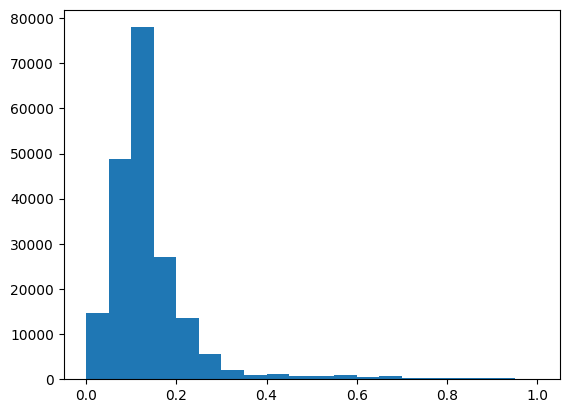

In [46]:
column_name = "absence_percentage_staff_students"

plt.hist(ont_abs[column_name], bins=20)

plt.show()